In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Enabling cuda device, if available

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Hyperparameter setting

In [17]:
input_size = 784 #28*28 images, when flattened becomes 784*1
hidden_size = 100
num_classes = 10
epochs = 10
batch_size = 100
learning_rate = 0.001

### Loading the MNIST dataset

In [18]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=batch_size, shuffle=False)


In [6]:
sample = iter(train_loader)

features, labels = sample.next()
print(features.shape, labels.shape) ##Checking the shape

torch.Size([100, 1, 28, 28]) torch.Size([100])


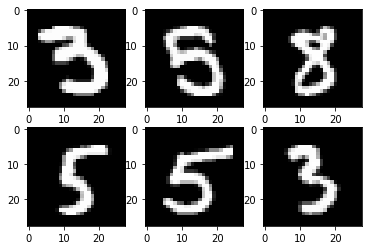

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0], cmap='gray')
    
plt.show()

### Configuring the neural net and the loss and optimizer functions

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_shape, hidden_shape, output_shape):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_shape, hidden_shape)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_shape, output_shape)
        
    def forward(self, X):
        out = self.l1(X)
        out = self.relu(out)
        out = self.l2(out)
        #We are applying cross entropy loss. So we need not apply the softmax activation to the last layer
        
        return out
    

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    

### Training loop

In [14]:
total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        #Flatten the image from (100, 1, 28,28) to (100, 784)
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #Moves to gpu if available
        
        #Forward
        pred = model(images)
        #Loss
        loss = criterion(pred, labels)
        #Backward pass
        loss.backward()
        #Update weights
        optimizer.step()
        #Reset gradients to 0
        optimizer.zero_grad()
        
        #User prompt
        if (i+1)%100==0:
            print(f'epoch {epoch}/{epochs}, step(mini-batch) {i+1}/{total_steps}, loss = {loss.item():.6f}')
            

        

epoch 0/10, step(mini-batch) 100/600, loss = 0.113475
epoch 0/10, step(mini-batch) 200/600, loss = 0.092480
epoch 0/10, step(mini-batch) 300/600, loss = 0.154662
epoch 0/10, step(mini-batch) 400/600, loss = 0.145344
epoch 0/10, step(mini-batch) 500/600, loss = 0.105420
epoch 0/10, step(mini-batch) 600/600, loss = 0.155462
epoch 1/10, step(mini-batch) 100/600, loss = 0.181675
epoch 1/10, step(mini-batch) 200/600, loss = 0.228351
epoch 1/10, step(mini-batch) 300/600, loss = 0.066433
epoch 1/10, step(mini-batch) 400/600, loss = 0.088146
epoch 1/10, step(mini-batch) 500/600, loss = 0.098245
epoch 1/10, step(mini-batch) 600/600, loss = 0.164223
epoch 2/10, step(mini-batch) 100/600, loss = 0.058355
epoch 2/10, step(mini-batch) 200/600, loss = 0.142371
epoch 2/10, step(mini-batch) 300/600, loss = 0.124580
epoch 2/10, step(mini-batch) 400/600, loss = 0.089672
epoch 2/10, step(mini-batch) 500/600, loss = 0.154072
epoch 2/10, step(mini-batch) 600/600, loss = 0.148376
epoch 3/10, step(mini-batch)

In [12]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #Predictions using trained model
        outputs = model(images)
        
        #Removing one hot encoding from the predictions
        _,predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0*n_correct/n_samples
    print(f'accuracy = {acc}')

accuracy = 94.99
